# Init

In [16]:
import collections


## Dataset-specific -- edit me
data_number = "082"
data_name = "Final"

treatments = collections.OrderedDict()
treatments['control'] = 'control'
treatments['noreward'] = 'benign'
treatments['punish'] = 'harsh'

## basic config
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/ALife\ CE\ Paper/alife2016/evo_mod/"
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/"
base_path = "/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/"

raw_data_directory = "raw_data"
analysis_directory = "intermediate_data"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + raw_data_directory + "/" + data_directory
analysis_path = base_path + analysis_directory

print (data_path)
print (analysis_path)



/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/raw_data/082_Final
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/intermediate_data


In [17]:
%cd {data_path}
%mkdir {analysis_path}
%cd {analysis_path}
%pwd


/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/raw_data/082_Final
mkdir: cannot create directory ‘/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/intermediate_data’: File exists
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/intermediate_data


u'/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/intermediate_data'

In [4]:
import glob


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.20.3'

In [5]:
import sys
sys.path.append({scripts_path})
%run {scripts_path}/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

# Filtered

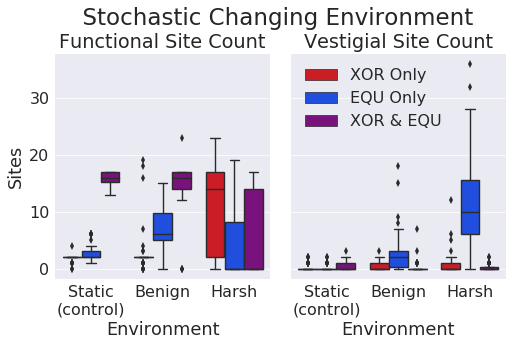

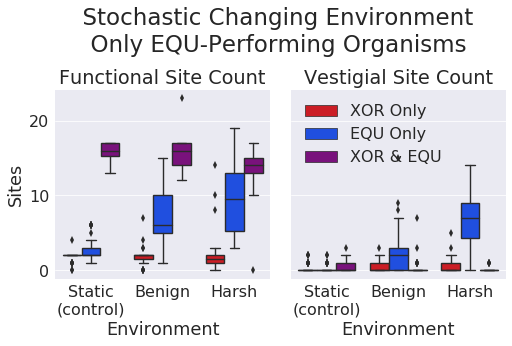

In [31]:
subdir = "../200_StochasticCE/"

dfs = []

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

for treatment in treatments:
    filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_active_site_counts__with_task_performance.csv"
    filepath = filepath.replace("\\", "")
    filepath = sorted(glob.glob(filepath))[0]    
        
    # fluct, bb, both, total, org_id, does_xor, does_equ    
    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2, 6],comment="#",skip_blank_lines=True,
                names=["EQU Only", "XOR Only", "XOR & EQU", "Does_EQU"])
    
    df = pd.melt(df, id_vars=["Does_EQU"], value_name="Sites", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    df['Site'] = ["Active"] * len(df)
    
    #print df.head()
    
    dfs.append(df)
    
actives = pd.concat(dfs)

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_vestigial_site_counts__with_task_performance.csv"
    filepath = filepath.replace("\\", "")
    filepath = sorted(glob.glob(filepath))[0]
            
    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2, 6],
                names=["EQU Only", "XOR Only", "XOR & EQU", "Does_EQU"],
                comment="#",
                skip_blank_lines=True,
                )
    df = pd.melt(df, id_vars=["Does_EQU"], value_name="Sites", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    df['Site'] = ["Vestigial"] * len(df)
    dfs.append(df)
    
vestigials = pd.concat(dfs)

combined = pd.concat([actives, vestigials])

############ NON FILTERED ##################


sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="bright"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Sites",
                   hue="Type",
                   col="Site",
                   data=combined, 
                   hue_order=["XOR Only", "EQU Only", "XOR & EQU"],
                   size=5, aspect=.75, #
                   palette={"EQU Only": "b", 
                            "XOR Only": "r",
                            "XOR & EQU": "#89008E"},
                   kind="box", 
                   legend=False)              

plt.subplots_adjust(top=0.85)
g.fig.suptitle("      Stochastic Changing Environment") # can also get the figure from plt.gcf()   

titles = ["Functional Site Count", "Vestigial Site Count"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    
L=plt.legend(loc="upper left")


### filter out
plt.show()

################# FILTERED ###################

filtered = combined.loc[combined["Does_EQU"] == 1]
sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="bright"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Sites",
                   hue="Type",
                   col="Site",
                   data=filtered, 
                   hue_order=["XOR Only", "EQU Only", "XOR & EQU"],
                   size=5, aspect=.75, #
                   palette={"EQU Only": "b", 
                            "XOR Only": "r",
                            "XOR & EQU": "#89008E"},
                   kind="box", 
                   legend=False)              

plt.subplots_adjust(top=0.75)
g.fig.suptitle("      Stochastic Changing Environment\n      Only EQU-Performing Organisms") # can also get the figure from plt.gcf()   

titles = ["Functional Site Count", "Vestigial Site Count"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    
L=plt.legend(loc="upper left")

# Stats

## Fetch the Cyclic

In [10]:
subdir = "../201_CyclicCE/"

dfs = []

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

for treatment in treatments:
    filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_active_site_counts.csv"
    filepath = filepath.replace("\\", "")
    print filepath
    filepath = sorted(glob.glob(filepath))[0]    
        
    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],comment="#",skip_blank_lines=True,
                names=["EQU Only", "XOR Only", "XOR & EQU"])
    
    df = pd.melt(df, value_name="Sites", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    df['Site'] = ["Active"] * len(df)
    dfs.append(df)
    
cyclic_actives = pd.concat(dfs)

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_vestigial_site_counts.csv"
    filepath = filepath.replace("\\", "")
    filepath = sorted(glob.glob(filepath))[0]
            
    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],
                names=["EQU Only", "XOR Only", "XOR & EQU"],
                comment="#",
                skip_blank_lines=True,
                )
    df = pd.melt(df, value_name="Sites", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    df['Site'] = ["Vestigial"] * len(df)
    dfs.append(df)
    
cyclic_vestigials = pd.concat(dfs)



/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*control*dominant_active_site_counts.csv
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*noreward*dominant_active_site_counts.csv
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*punish*dominant_active_site_counts.csv


## Vestigials

In [23]:
vest_filtered = filtered.loc[filtered['Site'] == 'Vestigial']
print vest_filtered.describe()
print vest_filtered.head()

       Does_EQU       Sites
count     333.0  333.000000
mean        1.0    1.054054
std         0.0    2.357395
min         1.0    0.000000
25%         1.0    0.000000
50%         1.0    0.000000
75%         1.0    1.000000
max         1.0   15.000000
   Does_EQU      Type  Sites        Environment       Site
0         1  EQU Only      1  Static\n(control)  Vestigial
1         1  EQU Only      0  Static\n(control)  Vestigial
2         1  EQU Only      0  Static\n(control)  Vestigial
3         1  EQU Only      0  Static\n(control)  Vestigial
4         1  EQU Only      0  Static\n(control)  Vestigial


In [13]:
def mww(a, b, nameA, nameB, title):
    print
    print title + " - " + nameA + " vs " + nameB
    print "-----------------"
    print stats.ranksums(a['Sites'], b['Sites']) 
    z_stat, p_val = stats.ranksums(a['Sites'], b['Sites'])  

    #print (z_stat)
    #print (p_val)

    if p_val < (0.05/3): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
    print "medians"
    print a['Sites'].median()
    print b['Sites'].median()

    

In [15]:

# Vestigial - Harsh vs Benign - EQU Only
equonly = vest_filtered.loc[vest_filtered['Type'] == 'EQU Only']

a = equonly.loc[equonly['Environment'] == 'Static\n(control)']
b = equonly.loc[equonly['Environment'] == 'Benign']
c = equonly.loc[equonly['Environment'] == 'Harsh']

c_equonly = cyclic_vestigials.loc[cyclic_vestigials['Type'] == 'EQU Only']

c_a = c_equonly.loc[c_equonly['Environment'] == 'Static\n(control)']
c_b = c_equonly.loc[c_equonly['Environment'] == 'Benign']
c_c = c_equonly.loc[c_equonly['Environment'] == 'Harsh']


mww(a, c_a, "Stoch", "Cyclic", "Static")
mww(b, c_b, "Stoch", "Cyclic", "Benign")
mww(c, c_c, "Stoch", "Cyclic", "Harsh")




Static - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=0.46171048826923694, pvalue=0.64428894872088605)
can't reject null of sameness
medians
0.0
0.0

Benign - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=1.4573188488335307, pvalue=0.14502838618903202)
can't reject null of sameness
medians
2.0
1.0

Harsh - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=-1.1063216964967635, pvalue=0.26858730412648057)
can't reject null of sameness
medians
7.0
8.0


## Functional

In [25]:
func_filtered = filtered.loc[filtered['Site'] == 'Active']
print func_filtered.describe()
print func_filtered.head()

       Does_EQU       Sites
count     333.0  333.000000
mean        1.0    7.723724
std         0.0    6.339440
min         1.0    0.000000
25%         1.0    2.000000
50%         1.0    6.000000
75%         1.0   14.000000
max         1.0   23.000000
   Does_EQU      Type  Sites        Environment    Site
0         1  EQU Only      4  Static\n(control)  Active
1         1  EQU Only      2  Static\n(control)  Active
2         1  EQU Only      2  Static\n(control)  Active
3         1  EQU Only      2  Static\n(control)  Active
4         1  EQU Only      5  Static\n(control)  Active


In [27]:

# Active - Harsh vs Benign - EQU Only
equonly = func_filtered.loc[func_filtered['Type'] == 'EQU Only']

a = equonly.loc[equonly['Environment'] == 'Static\n(control)']
b = equonly.loc[equonly['Environment'] == 'Benign']
c = equonly.loc[equonly['Environment'] == 'Harsh']

c_equonly = cyclic_actives.loc[cyclic_actives['Type'] == 'EQU Only']

c_a = c_equonly.loc[c_equonly['Environment'] == 'Static\n(control)']
c_b = c_equonly.loc[c_equonly['Environment'] == 'Benign']
c_c = c_equonly.loc[c_equonly['Environment'] == 'Harsh']


mww(a, c_a, "Stoch", "Cyclic", "Static")
mww(b, c_b, "Stoch", "Cyclic", "Benign")
mww(c, c_c, "Stoch", "Cyclic", "Harsh")




Static - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=0.37979411131824331, pvalue=0.7040982538952929)
can't reject null of sameness
medians
2.0
2.0

Benign - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=1.7200467539753503, pvalue=0.085423943269216096)
can't reject null of sameness
medians
6.0
6.0

Harsh - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=0.66012565315828986, pvalue=0.50917319758572077)
can't reject null of sameness
medians
9.5
8.0


In [29]:

# Active - Harsh vs Benign - XOR & EQU
equonly = func_filtered.loc[func_filtered['Type'] == 'XOR & EQU']

a = equonly.loc[equonly['Environment'] == 'Static\n(control)']
b = equonly.loc[equonly['Environment'] == 'Benign']
c = equonly.loc[equonly['Environment'] == 'Harsh']

c_equonly = cyclic_actives.loc[cyclic_actives['Type'] == 'XOR & EQU']

c_a = c_equonly.loc[c_equonly['Environment'] == 'Static\n(control)']
c_b = c_equonly.loc[c_equonly['Environment'] == 'Benign']
c_c = c_equonly.loc[c_equonly['Environment'] == 'Harsh']


mww(a, c_a, "Stoch", "Cyclic", "Static")
mww(b, c_b, "Stoch", "Cyclic", "Benign")
mww(c, c_c, "Stoch", "Cyclic", "Harsh")




Static - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=-0.64416060056917734, pvalue=0.51947129679177517)
can't reject null of sameness
medians
16.0
16.0

Benign - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=0.73481710969352676, pvalue=0.46245088549731705)
can't reject null of sameness
medians
16.0
16.0

Harsh - Stoch vs Cyclic
-----------------
RanksumsResult(statistic=-3.0500250085739506, pvalue=0.0022882231158782369)
reject null of sameness (different)
medians
14.0
16.0
